In [1]:
from glob import glob
from pprint import pprint
from random import sample

import matplotlib.pyplot as plt
from numpy import mean

import texte

In [2]:
# with open("LGERM.json", encoding="utf-8") as f:
#     LGERM = json.load(f)
# mots_LGERM = set(LGERM)

path = "Corpus/Mazarinades/*/*.xml"

files = glob(path)

print(len(files))

3065


texte.corpora(path)

Distribution mots outils

OCR performance prediction using cross-OCR
alignment
Ahmed BEN SALAH*, Jean philippe MOREUXt
, Nicolas RAGOT+ and Thierry PAQUET§

https://dl.acm.org/doi/pdf/10.1145/2595188.2595221


sample_mode = False

if sample_mode:
    files = sample(files, 200)
#     collection_textes = [texte.Texte(file) for file in tqdm(files)]
# else:
collection_textes = [e for e in texte.corpora(files) if e.plain]


collection_textes[0].texte

In [3]:
import pickle

with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)
import texte


In [4]:
counter_lexiques = {l : 0 for l in texte.Texte.lexique}
for txt in collection_textes:
    try:
        counter_lexiques[txt.langue] += 1
    except KeyError:
        print(f"{txt.path} : {txt.langue}")
        counter_lexiques[txt.langue] = 1


counter_lexiques

{'ducange': 0, 'LGERM': 2070, 'tlfi': 945, 'morphalou': 49, 'glaff': 0}

In [5]:
ratio_lexiques = {k: (v/len(files))*100 for k, v in counter_lexiques.items()}
ratio_lexiques

{'ducange': 0.0,
 'LGERM': 67.53670473083197,
 'tlfi': 30.831973898858074,
 'morphalou': 1.598694942903752,
 'glaff': 0.0}

In [46]:
[(e, len(v)) for e, v in texte.Texte.lexique.items()]

[('ducange', 103083),
 ('LGERM', 2765324),
 ('tlfi', 365737),
 ('morphalou', 740830),
 ('glaff', 1082688)]

In [44]:
texte.Texte.lexique["ducange"]

{'apacare',
 'mandatum pauperum',
 'alapacius',
 'barta',
 'choerogryllus',
 'questa',
 'triplo decantare',
 'cirliscus',
 'solari',
 'dulciana',
 'tondere',
 'diplora',
 'cordiger',
 'gutura',
 'lacrima',
 'tesqua',
 'tenura',
 'omago',
 'celel',
 'obfibulare',
 'ultimate',
 'horologium excitatorium',
 'insurrectio',
 'carolini',
 'cacellus',
 'holosericus',
 'battifollum',
 'clerici consilii',
 'gyodus',
 'peytralis',
 'capellus de pilis salamandræ',
 'strophatus',
 'escollata',
 'umblicus',
 'commendia',
 'marsalix',
 'scribones',
 'antigenus',
 'coni',
 'herbacia',
 'palheum',
 'quotidialiter',
 'trainare',
 'aclasis',
 'conreer',
 'plomellus',
 'instrumenta musica',
 'agenevores',
 'sogneia',
 'inobservabilis',
 'caroli martelli',
 'noyreguerius',
 'advigilium',
 'effebus',
 'vadium adchramire',
 'postra',
 'ostagius',
 'breve de protectione regis infracta',
 'doela',
 'claxendis',
 'vireli',
 'singulator',
 'domgio',
 'plenterium',
 'trunina',
 'thyuphadus',
 'trufa',
 'asta',
 '

In [50]:
lex_moyenne = {l : 0 for l in texte.Texte.lexique}
print(lex_moyenne)

for t in collection_textes:
    for k, v in t.dict_lexicalite.items():
        lex_moyenne[k] += v

lex_moyenne = {k: v/len(collection_textes) for k, v in lex_moyenne.items()}
lex_moyenne

{'ducange': 0, 'LGERM': 0, 'tlfi': 0, 'morphalou': 0, 'glaff': 0}


{'ducange': 0.10719688231322688,
 'LGERM': 0.4443181101418581,
 'tlfi': 0.44208619557925816,
 'morphalou': 0.3953686056371071,
 'glaff': 0.3729942318783534}

In [6]:
lst_morpahlou = [txt for txt in collection_textes if txt.langue == "morphalou"]
for e in lst_morpahlou:
    m, o = sorted(e.dict_lexicalite.items(), key=lambda x: x[1], reverse=True)[:2]
    print(m[1] - o[1])

0.020891121059099405
0.006040211842591681
0.05543936892313339
0.09999999999999998
0.04128304128304128
0.01597552996133117
0.0016411717346875854
0.027199997487153127
0.037735849056603765
0.0002125850340135571
0.01864626185075363
0.0220248581368791
0.0017393226656384764
0.00882764896063315
0.007246712891032625
0.0004870380094886828
0.017505427823860165
0.08862433862433866
0.015473834691477284
0.005377897565397527
0.01125035095623328
0.023176312998827886
0.0041493060784648095
0.005268716585865307
0.0036128492670365886
0.02222711300643382
0.018009768009768
0.04139171207009834
0.0023097769772891796
0.04742786985880909
0.0020279488217970765
0.011316459914400057
0.008169143363560116
0.011666908126582498
0.07275294332586418
0.008170497486412354
0.0015198877091460172
0.02439024390243902
0.0034059787949412
0.0001159808008880936
0.029633378317588832
0.00952821960230893
0.011212088286917887
0.020176633431324753
0.04918032786885246
0.013707729468598995
0.001680020677177596
0.007563706092610312
0.02

In [7]:
import json

lst = [[files[i], e.header, e.texte] for i, e in enumerate(collection_textes)]

with open("headers.json", "w") as f:
    json.dump(lst, f, indent=4, ensure_ascii=False)

In [8]:
import pandas as pd

df0 = pd.DataFrame(txt.header for txt in collection_textes)
df = pd.DataFrame(
    ((txt.path.name, txt.n_pages, txt.hapax_ratio, txt.ttr, txt.lexicalite) for txt in collection_textes),
    columns = ["fichier", "n_pages", "hapax_ratio", "ttr", "lexicalite"]
)
concat = pd.concat([df, df0], axis=1)

In [9]:
concat.drop("titre", axis=1).to_csv("stats.csv", sep=";")

In [10]:
concat

,fichier,n_pages,hapax_ratio,ttr,lexicalite,form,genre,subject,handwritten_note,table_of_content,illustration,creation,change,titre,dates,langue,fichier,langue_detectee,subgenre
0,Moreau100_GALL.xml,7,0.672598,0.827138,0.398681,vers,"[poésie, burlesque, satirique]","Conti, Armand de Bourbon, prince de, 1629-1666",False,False,False,1650-01-18,"{'@status': 'corrected', '@when': '2022-09-06'...",L'apologie de l'autruche en vers burlesques.,"[{'@type': 'file_creation', '@when': '2021-02-...",fra,Moreau100_GALL.xml,LGERM,NaN
1,Moreau13_GALL.xml,6,0.651934,0.839521,0.390564,vers,"[pamphlet, satirique]",Scarron,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-09-23'...",A un ministre d’État sur les œufs,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau13_GALL.xml,LGERM,NaN
2,Moreau14_GBOOKS.xml,7,0.594727,0.744542,0.479540,prose,nouvelles,"[Beaufort, François de Bourbon-Vendôme, duc de...",False,False,False,1652-07-30,"{'@status': 'corrected', '@when': '2022-03-24'...",L’abolition de M. le duc de Beaufort au parlem...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau14_GBOOKS.xml,LGERM,NaN
3,Moreau17_GBOOKS.xml,7,0.739745,0.821921,0.390534,"[vers, prose]",NaN,NaN,False,False,False,1649-03-30,"{'@status': 'corrected', '@when': '2022-03-24'...",Les acclamations de joie des bons Parisiens su...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Moreau17_GBOOKS.xml,tlfi,NaN
4,Moreau18_GBOOKS.xml,7,0.688969,0.799069,0.409904,prose,articles,NaN,False,False,False,1649-01-30,"{'@status': 'corrected', '@when': '2022-10-25'...",L'accord passé entre les quatre empereurs de l...,"{'@type': 'file_creation', '@when': '2022-10-2...",fra,Moreau18_GBOOKS.xml,tlfi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,Socard85_GALL.xml,5,0.733333,0.815637,0.383957,vers,pamphlet,Scarron,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Touche aux plumes vénales et ingrates de ce\n ...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard85_GALL.xml,LGERM,NaN
3060,Socard86_GBOOKS.xml,15,0.604105,0.712556,0.481110,prose,"[rhétorique délibérative, remontrances]",None,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Très-humbles remontrances à Mademoiselle et à ...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard86_GBOOKS.xml,LGERM,NaN
3061,Socard87_GBOOKS.xml,12,0.604681,0.723683,0.462238,prose,"[didactique, sermon]",None,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-08'...",Troisième et dernier sermon de l’Eucharistie p...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard87_GBOOKS.xml,LGERM,NaN
3062,Socard93_GBOOKS.xml,12,0.597906,0.706313,0.521009,prose,"[nouvelles, récit, discours adressé]",Emprisonnement des\n Princes,False,False,False,NaN,"{'@status': 'corrected', '@when': '2022-08-09'...",Particularités (Les) de la détention des Princ...,"{'@type': 'file_creation', '@when': '2021-11-0...",fra,Socard93_GBOOKS.xml,tlfi,NaN


In [11]:
concat.to_csv("stats.csv", sep=";")


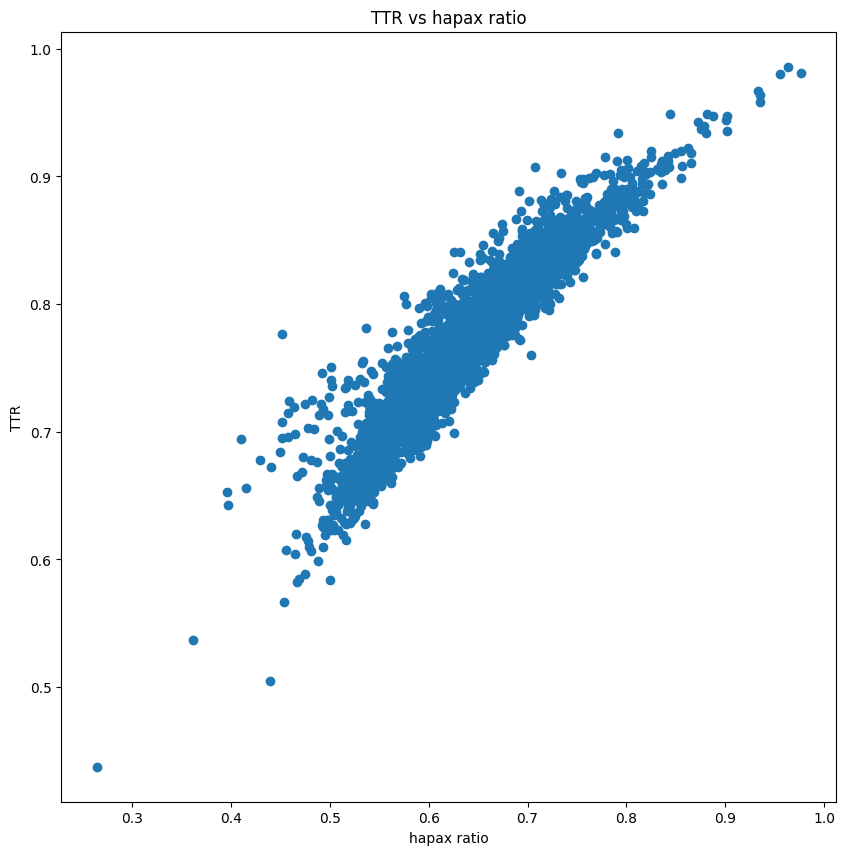

In [12]:
#tup = [(val["hapax_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.hapax_ratio, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs hapax ratio")
plt.xlabel("hapax ratio")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

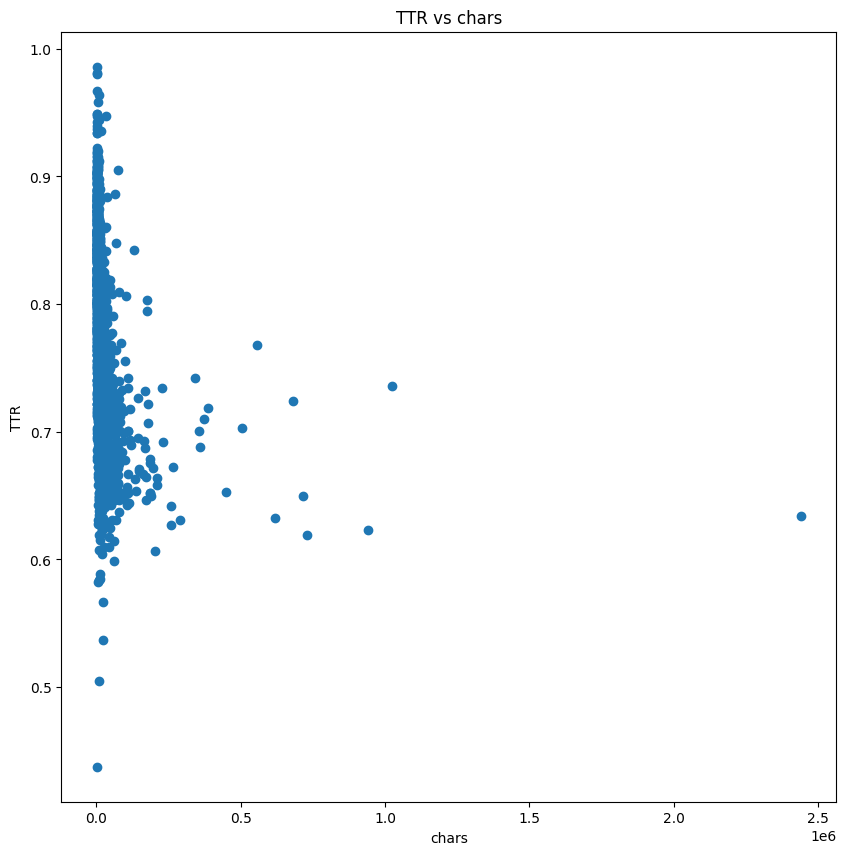

In [13]:
# tup = [(val["chars"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.n_chars, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("TTR vs chars")
plt.xlabel("chars")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [14]:
x = [txt.n_pages for txt in collection_textes]
print(mean(x))

13.157637075718016


In [15]:
mean([len(txt.texte) for txt in collection_textes])

13.157637075718016

In [16]:
x = [len(txt.plain) for txt in collection_textes]
print(mean(x))

19338.924281984335


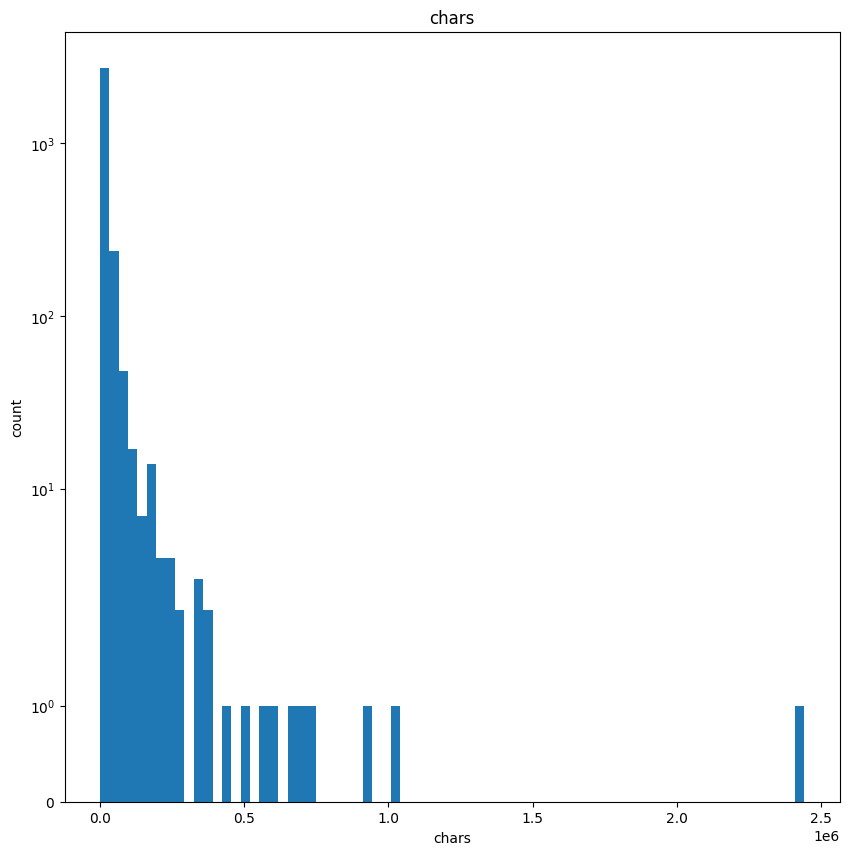

18898.512402088774


In [17]:
# x = [v["chars"] for v in dict_stats.values()]
x = [txt.n_chars if txt.n_chars else 0 for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("chars")
plt.xlabel("chars")
plt.ylabel("count")
plt.xscale('linear')
plt.yscale('symlog', linscale=1)
plt.hist(x, bins=75)

plt.show()

print(mean(x))

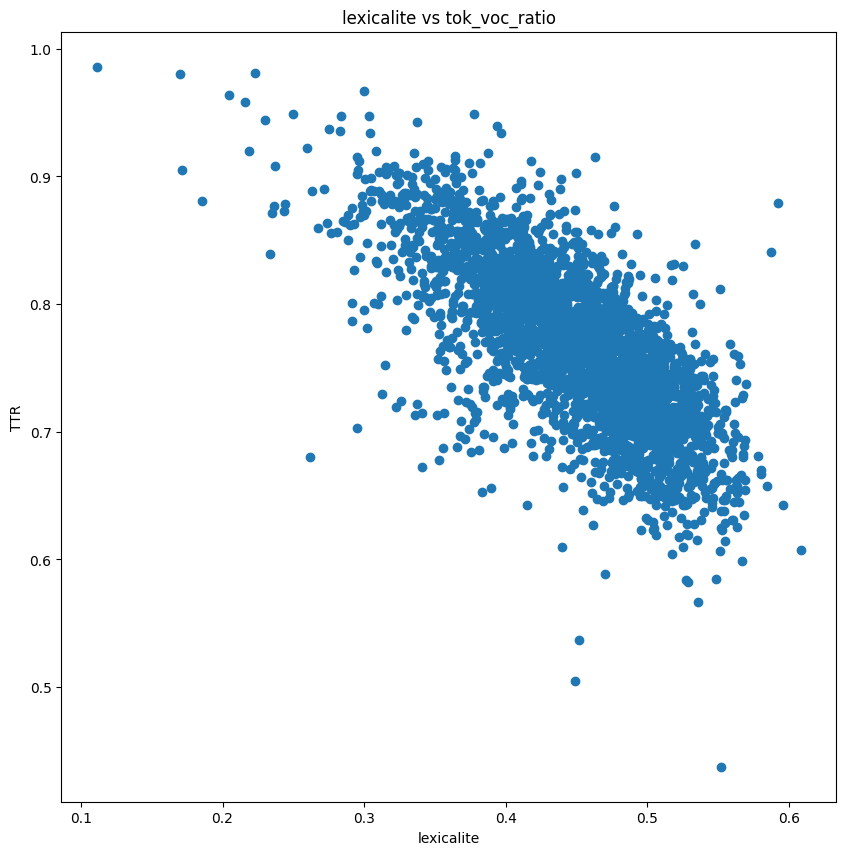

In [18]:
# tup = [(val["tok_voc_ratio"], val["ttr"]) for val in dict_stats.values()]
tup = [(txt.lexicalite, txt.ttr) for txt in collection_textes]

plt.figure(figsize=(10, 10))
plt.title("lexicalite vs tok_voc_ratio")
plt.xlabel("lexicalite")
plt.ylabel("TTR")

plt.scatter(*zip(*tup))

plt.show()

In [19]:
x = [txt.header["change"]["@status"] if isinstance(txt.header["change"], dict) else txt.header["change"][0]["@status"]
for txt in collection_textes]
len(x) / len([e for e in x if e == "corrected"])

1.0

In [20]:
for txt in collection_textes:
    pprint(txt.header)
    break

{'change': {'@status': 'corrected', '@when': '2022-09-06', '@who': 'AB'},
 'creation': '1650-01-18',
 'dates': [{'#text': '16 février 2021',
            '@type': 'file_creation',
            '@when': '2021-02-16'},
           {'#text': '23 avril 2021',
            '@type': 'correction',
            '@when': '2021-04-23'}],
 'fichier': 'Moreau100_GALL.xml',
 'form': 'vers',
 'genre': ['poésie', 'burlesque', 'satirique'],
 'handwritten_note': False,
 'illustration': False,
 'langue': 'fra',
 'langue_detectee': 'LGERM',
 'subject': 'Conti, Armand de Bourbon, prince de, 1629-1666',
 'table_of_content': False,
 'titre': "L'apologie de l'autruche en vers burlesques."}


In [21]:
txt.ttr, txt.lexicalite

(0.8271376534773252, 0.3986806760765206)

In [22]:
def stats(key):
    stats = {}
    for txt in collection_textes:
        type_ = txt.header["form"] if isinstance(txt.header["form"], str) else tuple(txt.header["form"])

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, key))

    # for k in stats:
    #     v = stats[k]
    #     v = [e for e in v if e]
    #     print(f"{k}: {mean(v):.3f}")
    #     stats[k] = v

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {key}")
    plt.xlabel("type")
    plt.ylabel(f"mean {key}")

    plt.bar(*zip(*plot))

    plt.show()

vers: 0.820
prose: 0.753
('vers', 'prose'): 0.762
('prose', 'manifeste'): 0.713
('prose', 'récit'): 0.788


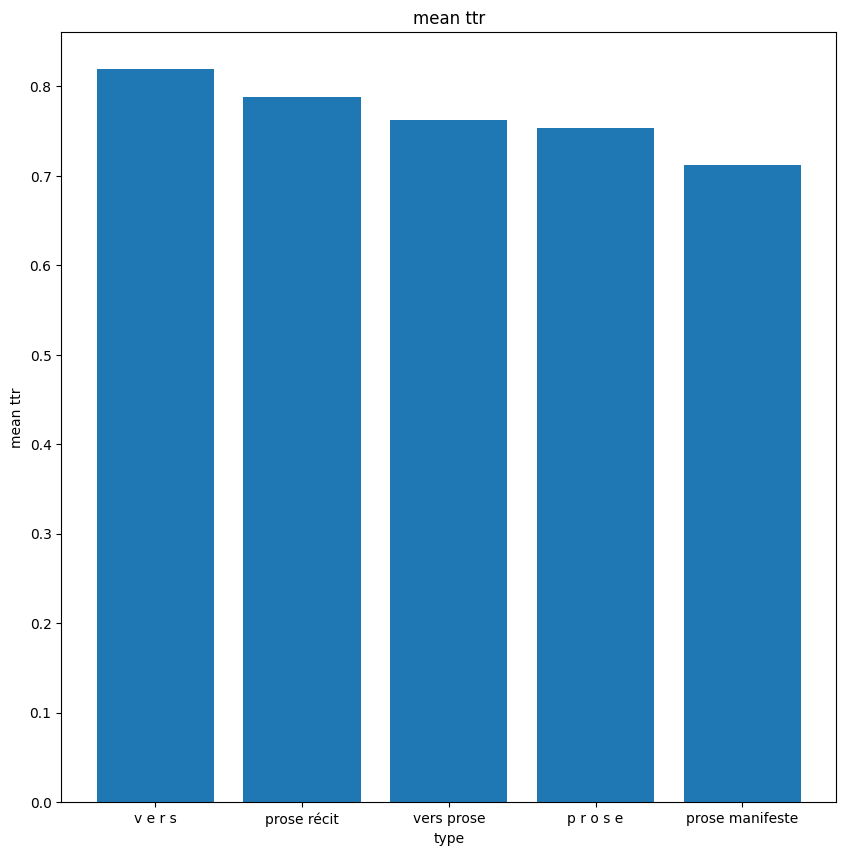

In [23]:
stats("ttr")


vers: 0.686
prose: 0.623
('vers', 'prose'): 0.630
('prose', 'manifeste'): 0.579
('prose', 'récit'): 0.621


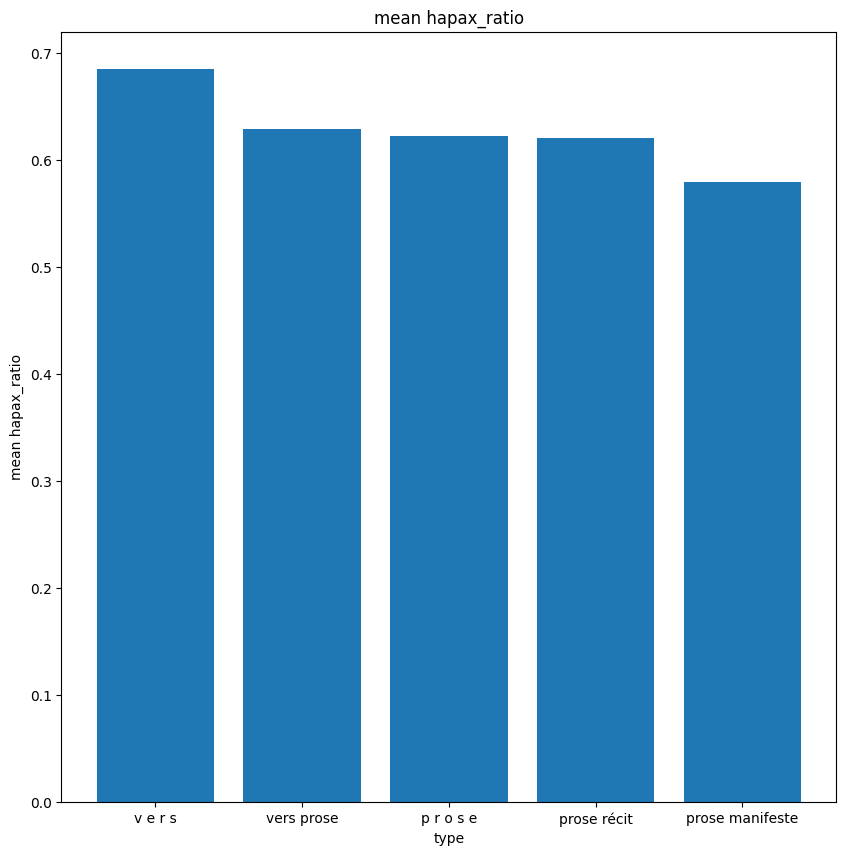

In [24]:
stats("hapax_ratio")

In [25]:
def stats2(header_prop, stats_prop):
    stats = {}
    for txt in collection_textes:
        if header_prop not in txt.header:
            continue

        type_ = txt.header[header_prop]

        if isinstance(type_, bool):
            type_ = str(type_)

        if not isinstance(type_, str):
            type_ = tuple(type_)

        if type_ not in stats:
            for e in stats.keys():
                if set(e) == set(type_):
                    type_ = e
                    break
            else:
                stats[type_] = []

        stats[type_].append(getattr(txt, stats_prop))

    for k, v in stats.items():
        print(f"{k}: {mean(v):.3f}")

    plot = [(" ".join(k), mean(v)) for k, v in stats.items()]
    plot = sorted(plot, key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 10))
    plt.title(f"mean {stats_prop}")
    plt.xlabel(f"{header_prop}")
    plt.ylabel(f"mean {stats_prop}")

    plt.bar(*zip(*plot))

    plt.show()


1650-01-18: 0.647
1652-07-30: 0.630
1649-03-30: 0.633
1652-01-01: 0.633
1650-09-02: 0.630
1649-06-26: 0.636
1649-08-18: 0.639
1652-08-19: 0.624
1652-03-05: 0.624
1650-03-05: 0.666
1649-02-08: 0.629
1648-04: 0.616
1650-10-01: 0.637
00-00-0000: 0.646
1649-04-16: 0.666
1652-02-27: 0.636
1651-04-05: 0.592
1652-08-07: 0.628
1649-09-05: 0.653
1652-04-20: 0.631
1649-03-15: 0.633
1651-04-18: 0.600
1652-04-07: 0.644
1650-05-09: 0.594
1649-03-22: 0.631
1651-07-06: 0.621
1652-09-24: 0.628
1649-12-11: 0.648
1652-08-26: 0.622
1650-07-04: 0.628
1651-08-17: 0.607
1651-09-13: 0.593
1651-09-07: 0.614
1652-08-23: 0.664
1652-04-28: 0.611
1651-12-12: 0.647
1649-07-17: 0.639


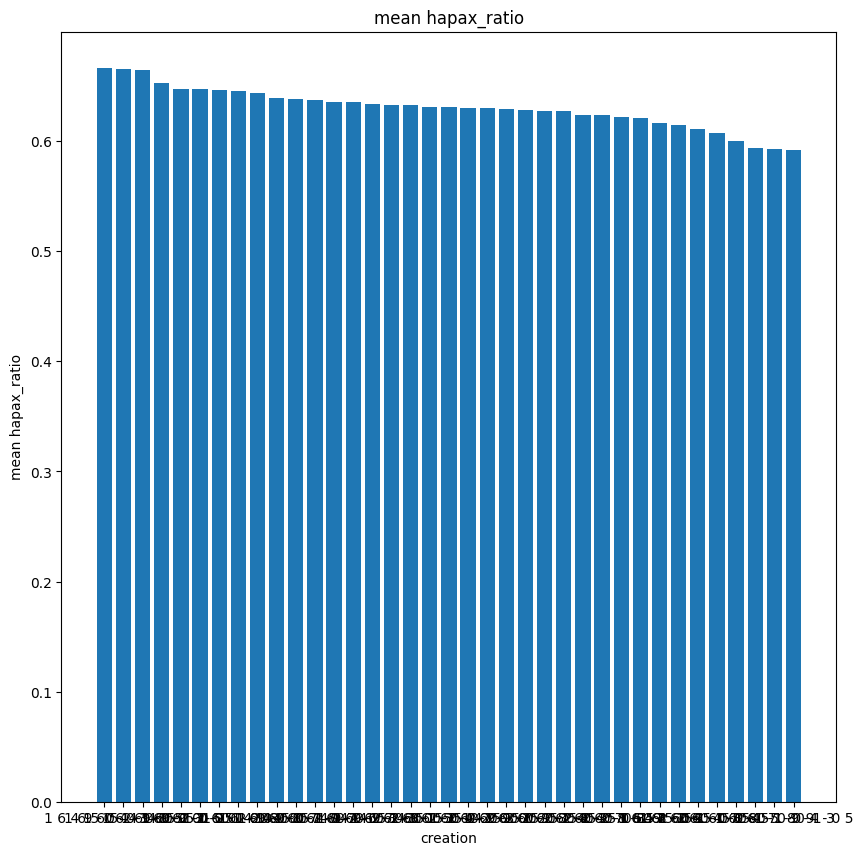

In [26]:
stats2("creation", "hapax_ratio")

1650-01-18: 0.785
1652-07-30: 0.756
1649-03-30: 0.769
1652-01-01: 0.762
1650-09-02: 0.755
1649-06-26: 0.768
1649-08-18: 0.771
1652-08-19: 0.756
1652-03-05: 0.753
1650-03-05: 0.796
1649-02-08: 0.764
1648-04: 0.742
1650-10-01: 0.765
00-00-0000: 0.786
1649-04-16: 0.793
1652-02-27: 0.762
1651-04-05: 0.722
1652-08-07: 0.751
1649-09-05: 0.777
1652-04-20: 0.762
1649-03-15: 0.766
1651-04-18: 0.723
1652-04-07: 0.768
1650-05-09: 0.721
1649-03-22: 0.764
1651-07-06: 0.754
1652-09-24: 0.754
1649-12-11: 0.767
1652-08-26: 0.752
1650-07-04: 0.765
1651-08-17: 0.744
1651-09-13: 0.723
1651-09-07: 0.746
1652-08-23: 0.789
1652-04-28: 0.740
1651-12-12: 0.793
1649-07-17: 0.772


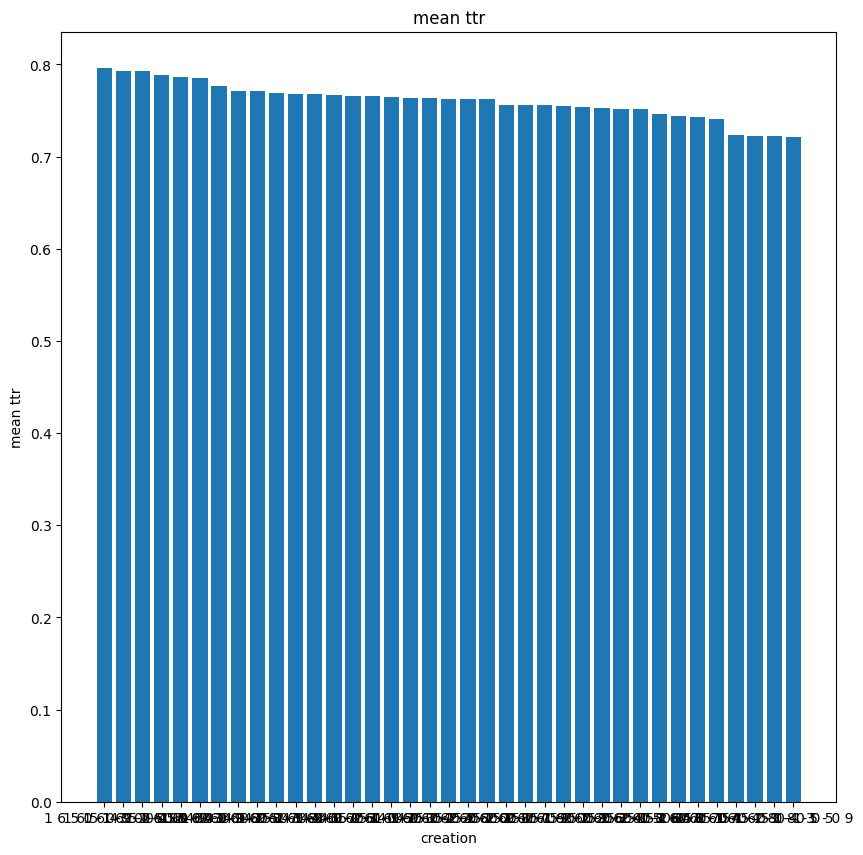

In [27]:
stats2("creation", "ttr")

False: 17008.459
True: 137656.854


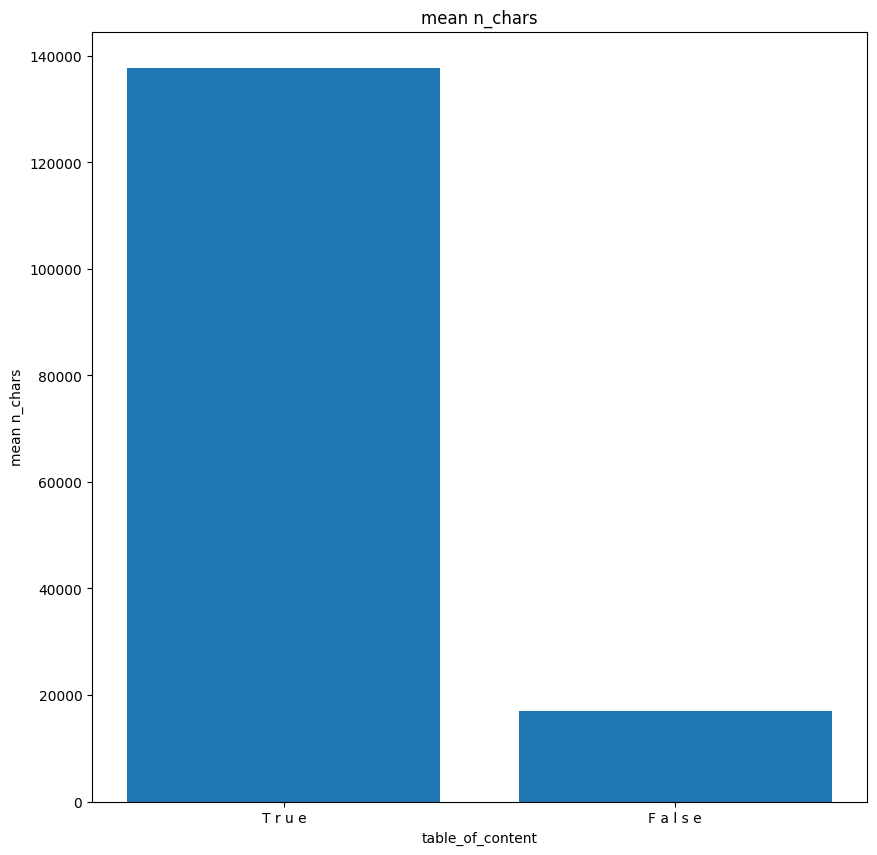

False: 0.768
True: 0.702


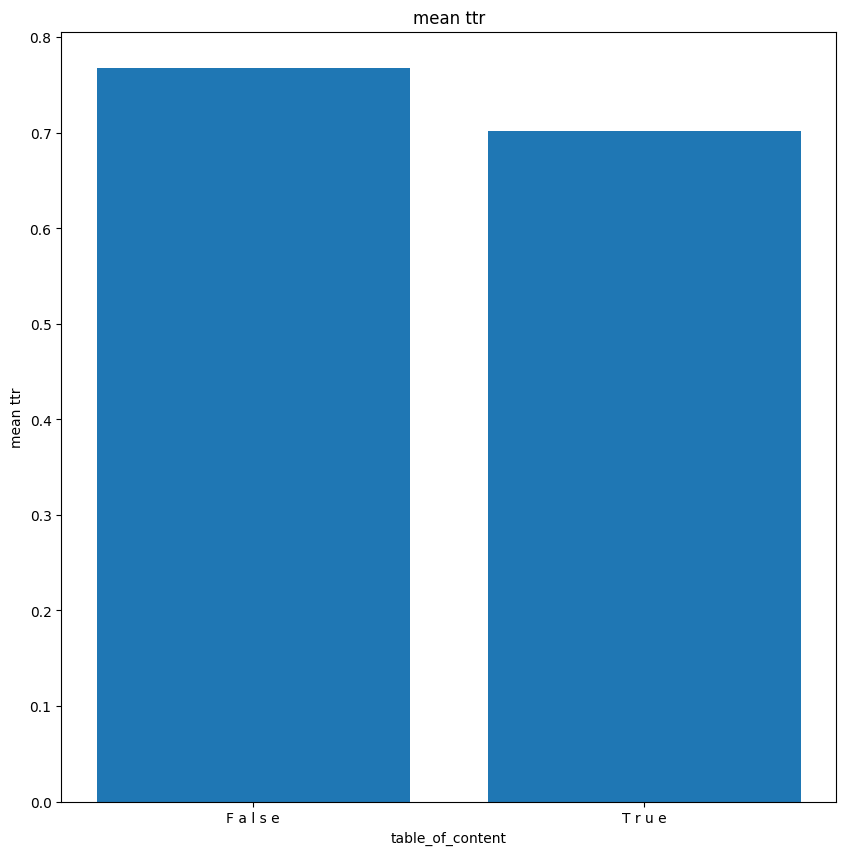

In [28]:
stats2("table_of_content", "n_chars")
stats2("table_of_content", "ttr")

In [29]:
import string

french_chars = {'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'œ', 'ù', 'û', 'ü', 'À', 'Â', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Î',
                'Ï', 'Ô',
                'Œ', 'Ù', 'Û', 'Ü', 'à', 'â', 'ä', 'æ', 'ç'}.union(set(string.printable))

"ſ" in french_chars, "a" in french_chars, "é" in french_chars, ":" in french_chars

(False, True, True, True)

In [30]:
def mot_is_french(mot):
    for char in mot:
        if char not in french_chars:
            return False
    return True

i, j, tot = 0, 0, 0

for txt in collection_textes:
    for page in txt.pages:
        for phrase in page:
            for mot in phrase.split():
                tot += 1
                if mot_is_french(mot):
                    i += 1
                else:
                    j += 1

print(i, j, tot, i / tot, j / tot)




46323639 2847110 49170749 0.9420974856413109 0.05790251435868915


In [31]:
ttrlist = [(txt.ttr, i) for i, txt in enumerate(collection_textes) if txt.ttr]
hapaxlist = [(txt.hapax_ratio, i) for i, txt in enumerate(collection_textes) if txt.hapax_ratio]
lexicalitelist = [(txt.lexicalite, i) for i, txt in enumerate(collection_textes) if txt.lexicalite]


In [32]:
ttrlist = sorted(ttrlist, key=lambda x: x[0], reverse=True)
hapaxlist = sorted(hapaxlist, key=lambda x: x[0], reverse=True)
lexicalitelist = sorted(lexicalitelist, key=lambda x: x[0], reverse=True)


In [33]:
print(ttrlist[-1])
collection_textes[ttrlist[-1][1]].header

(0.43763994557534286, 1557)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau2923_GALL.xml',
 'langue_detectee': 'LGERM'}

In [34]:
print(ttrlist[0])
collection_textes[ttrlist[0][1]].header

(0.9859603415834419, 458)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'lat',
 'fichier': 'Moreau1464_GBOOKS.xml',
 'langue_detectee': 'tlfi'}

In [35]:
print(hapaxlist[-1])
collection_textes[hapaxlist[-1][1]].header


(0.2640625, 1557)


{'form': 'vers',
 'subject': 'Condé, Louis de Bourbon, prince de, 1621-1686',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-06-22', '@who': 'AB'},
 'titre': 'Les propriétés diaboliques D. C.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau2923_GALL.xml',
 'langue_detectee': 'LGERM'}

In [36]:
print(hapaxlist[0])
collection_textes[hapaxlist[0][1]].header


(0.9766081871345029, 136)


{'form': 'vers',
 'genre': 'pamphlet',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-30',
 'change': {'@status': 'corrected', '@when': '2021-11-12', '@who': 'AB'},
 'titre': 'Dirœ in Angliam ob patratum scelus, IX februarii\n          1649.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau1098_GBOOKS.xml',
 'langue_detectee': 'tlfi'}

In [37]:
print(lexicalitelist[-1])
collection_textes[lexicalitelist[-1][1]].header


(0.11100255705118928, 458)


{'form': 'vers',
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'creation': '1649-01-26',
 'change': {'@status': 'corrected', '@when': '2022-03-02', '@who': 'AB'},
 'titre': 'Gallicinium nuper auditum, Franciam expilante Mazarino.\n          Quis dedit gallo intelligentiam ? JoB, 38. Qui preparat corvo escam suam. ID.',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'lat',
 'fichier': 'Moreau1464_GBOOKS.xml',
 'langue_detectee': 'tlfi'}

In [38]:
print(lexicalitelist[0])
collection_textes[lexicalitelist[0][1]].header


(0.6086273499377087, 1900)


{'form': 'prose',
 'genre': ['nouvelles', 'lettre', 'réponse'],
 'subject': None,
 'handwritten_note': False,
 'table_of_content': False,
 'illustration': False,
 'change': {'@status': 'corrected', '@when': '2022-11-03', '@who': 'KA'},
 'titre': 'Réponse à une lettre écrite de Rouen sur un libelle\n          intitulé : Apologie particulière pour M. le duc de Longueville, faite par un gentilhomme\n          breton..',
 'dates': {'@type': 'file_creation',
  '@when': '2021-11-02',
  '#text': '2 novembre 2021'},
 'langue': 'fra',
 'fichier': 'Moreau3355_GBOOKS.xml',
 'langue_detectee': 'LGERM'}

In [39]:
len(collection_textes)

3064

In [40]:
collection_textes[1876].lexicalite


0.4920639712156671

In [41]:
to_save = [
    (ttrlist[-1][1], "ttr_min"),
    (ttrlist[0][1], "ttr_max"),
    (hapaxlist[-1][1], "hapax_min"),
    (hapaxlist[0][1], "hapax_max"),
    (lexicalitelist[-1][1], "lexicalite_min"),
    (lexicalitelist[0][1], "lexicalite_max"),
]

from pathlib import Path

Path("extremes").mkdir(parents=True, exist_ok=True)

for i, name in to_save:
    txt = collection_textes[i]
    with open(f"extremes/{name}.txt", "w") as f:
        f.write('\n'.join(txt.pages))


paragraphes = []
temp = ""
for e in txt.split("\n\n"):
    if len(e) < 10 :
        continue
    temp += e
    if len(temp) > 2000:
        paragraphes.append(temp)
        temp = ""
